# 오픈뱅킹 농협 API

1. Request 모듈 Quickstart
2. [NH API 살펴보기](#NH-API-살펴보기)
    - [API 공통부](#API-공통부)
    - [잔액조회 API](#잔액조회-API)
        - [Python 이용 잔액 조회](#Python-이용-잔액-조회)
    - [타행예금주조회 API](#타행예금주조회-API)

## Requests Quick Start

Python [requests](http://docs.python-requests.org/en/v1.0.0/) 모듈은 사람에 친숙한 apache HTTP 라이브러리다. urllib2는 표준적인 HTTP를 제공하지만 대부분 다른 시간, 다른 웹 환경에서 개발되어 왔다.

requests와 cssselect를 함께 설치해 준다.

```Bash
pip install requests cssselect --user
pip install bs4 --user

# or

conda install requests cssselect
conda install bs4
```

In [ ]:
import requests
from bs4 import BeautifulSoup

### requests 사용해보기

HTTP method 에 적절한 함수를 사용한다.

```
response = requests.get('https://www.naver.com')
                    .post
                    .put
                    .delete
                    .head
                    .options
                    .trace
```

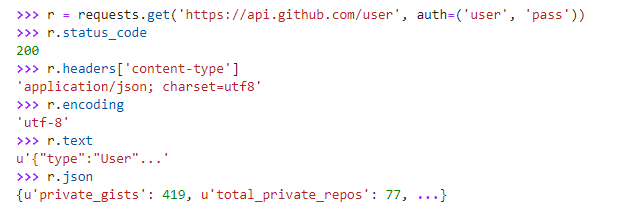


In [ ]:
r = requests.get('https://httpbin.org/get?param1=파라미터&value1=값')
r.status_code

#### response.text

문자열 데이터를 반환시 response.text 호출하면 유니코드로 변환한 내용이 반환된다. 


In [ ]:
print(r.text)

In [ ]:
r.encoding

#### response.content

모든 요청에는 헤더와 바디가 있는데 바디부분을 bytes로 반환을 한다. 그래서 텍스트를 .content 로 반환시 유니코드로 디코딩해서 반환한다.

```python
response.content.decode('utf-8')
```

In [ ]:
r.content.decode('utf-8')

#### JSON

또한 반환 데이터가 JSON이라면 내장한 JSON 디코더를 사용해서 JSON 데이터로 사용할 수 있다.

 - (1) json.loads(응답문자열)을 통해 직접 Deserialize를 수행
 - (2) 혹은 .json()함수를 통해 Deserialize를 수행
 - 응답문자열이 json포맷이 아닐 경우 JSONDecodeError예외가 발생


In [ ]:
response = requests.get('https://github.com/timeline.json')
response.json()

# NH API 살펴보기

1. API 공통부
1. 핀-어카운트 직접 발급
1. 잔액-조회


### API 공통부

#### 기본정보

- 요청 : API 전문 요청 시, 공통부의 Header와 함께 요청값을 전송합니다.
- 응답 : API 전문 응답 시, 공통부의 Header와 함께 응답값을 전송합니다.


#### - 요청

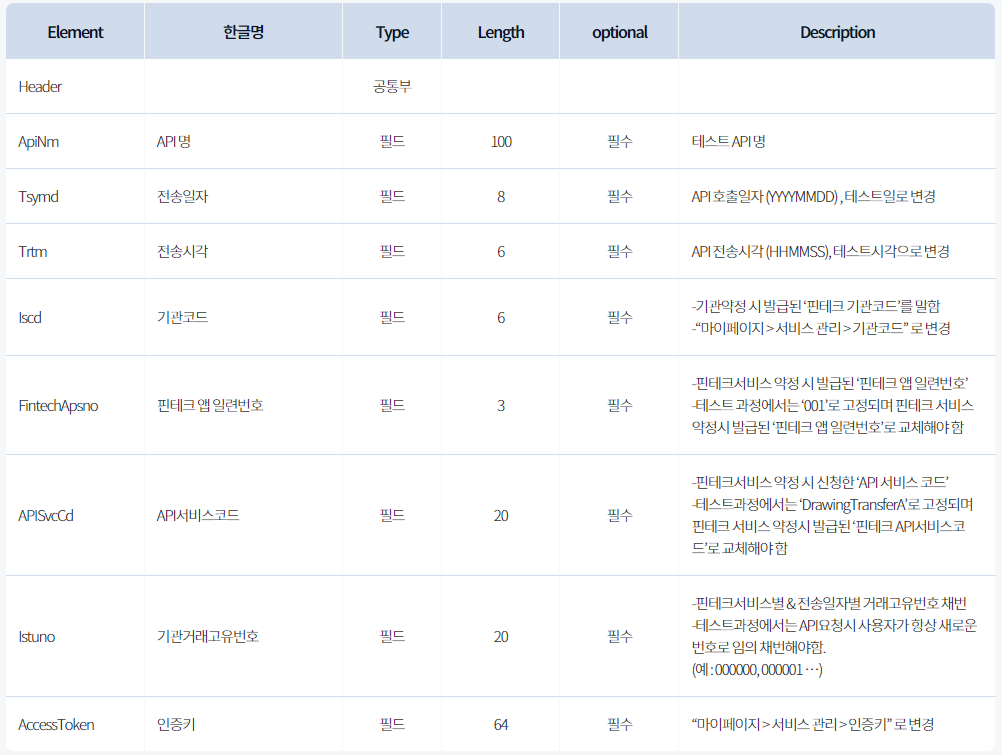

## 핀-어카운트 직접발급

직접발급 요청후 직접발급 확인 절차를 거쳐야 한다.

- 서비스 관리 정보
- API개발가이드 / 핀-어카운트 직접 발급 정보

In [ ]:
url_valance = 'https://developers.nonghyup.com/OpenFinAccountDirect.nh'
data = {
  "Header": {
    "ApiNm": "OpenFinAccountDirect",
    "Tsymd": "20220706",
    "Trtm": "112428",
    "Iscd": "기관코드
    "FintechApsno": "001",
    "ApiSvcCd": "DrawingTransferA",
    "IsTuno": "00000
    "AccessToken": "[토큰]"
  },
  "DrtrRgyn": "Y",
  "BrdtBrno": "생일,
  "Bncd": "011",       # 농협은행:011, 상호금융:012
  "Acno": "계좌번호
}

response = requests.post(url_valance, json=data)
response.status_code

In [ ]:
response.json()

### 핀-어카운트 직접발급 확인

직접발급 요청후 직접발급 확인 절차를 거쳐야 한다.

- 서비스 관리 정보
- API개발가이드 / 핀-어카운트 직접 발급 정보


> 요청시마다 다시 핀-어카운트가 발급되니 주의

In [ ]:
url_valance = 'https://developers.nonghyup.com/CheckOpenFinAccountDirect.nh'
data = {
  "Header": {
    "ApiNm": "CheckOpenFinAccountDirect",
    "Tsymd": "20220706",
    "Trtm": "112428",
    "Iscd": "001519",
    "FintechApsno": "001",
    "ApiSvcCd": "DrawingTransferA",
    "IsTuno": "0003",
    "AccessToken": "[토큰]"
  },
  "Rgno": "",
  "BrdtBrno": ""
}

response = requests.post(url_valance, json=data)
response.status_code

In [ ]:
response.json()

## 금융 조회

1.  금융조회
    - https://github.com/NH-developers/FundManagement
    - https://developers.nonghyup.com/guide/GU_2010

## 잔액조회 API

핀-어카운트 연결계좌에 대한 잔액을 조회합니다.

- 기능 : 핀-어카운트 연결계좌에 대한 잔액을 조회합니다.
- 방식 : HTTPS-POST
- 호출 정보 : InquireBalance.nh
- 호출결과 : JSON

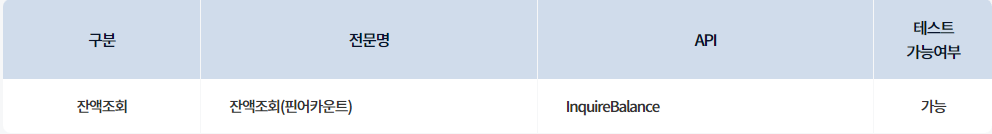

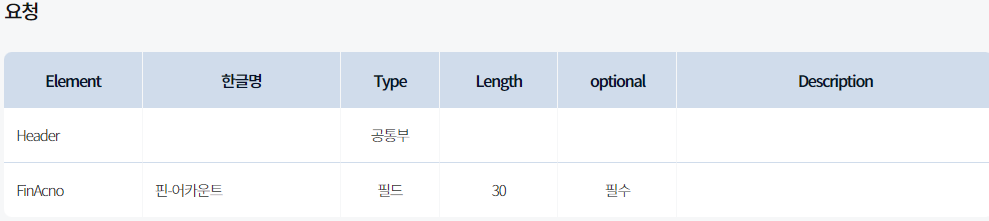

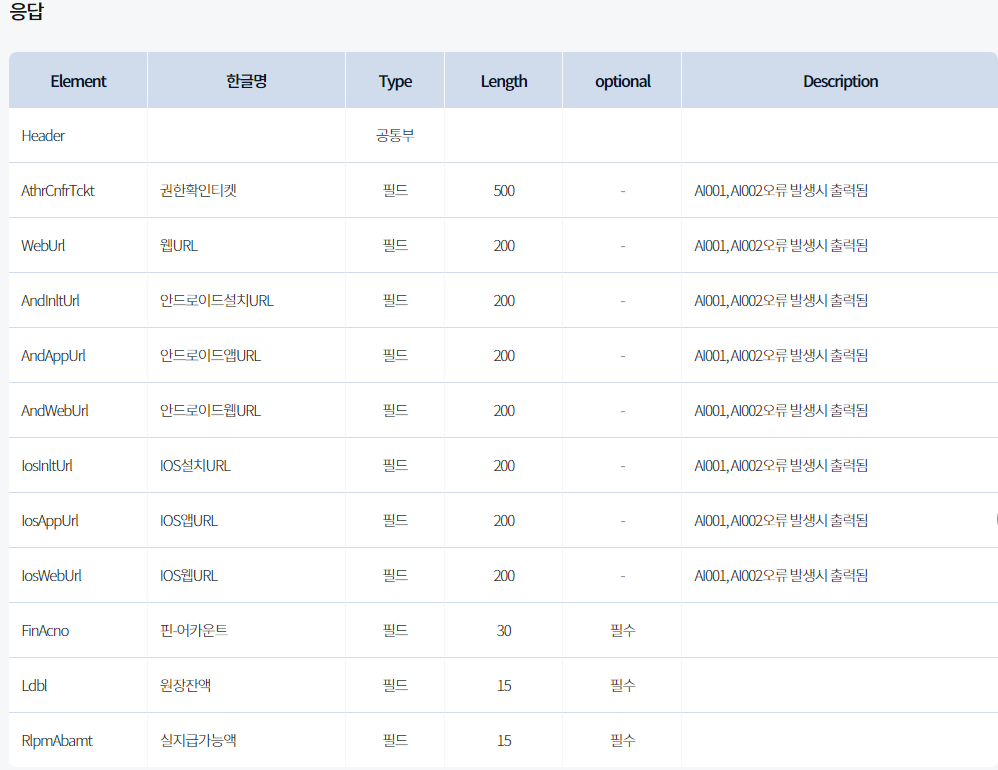

### Python 이용 잔액 조회

잔액조회를 하기 위해서

1. 핀-어카운트 계좌 발급 필요
1. **서비스관리** 에서 조회 가능
    - 기관코드
    - 인증코드
    - 핀-어카운트 계좌 번호


Request.post() 사용시 json 옵션을 사용해 REST API로 JSON 포멧의 데이터를 전송한다.

In [ ]:
url_valance = 'https://developers.nonghyup.com/InquireBalance.nh'
data = {
  "Header": {
    "ApiNm": "InquireBalance",
    "Tsymd": "20220706",
    "Trtm": "11191010",
    "Iscd": "001519",
    "FintechApsno": "001",
    "ApiSvcCd": "DrawingTransferA",
    "IsTuno": "00015",
    "AccessToken": "[토큰]"
  },
  "FinAcno": ""
}

response = requests.post(url_valance, json=data)
response.status_code

In [ ]:
response.json()

## 타행예금주조회 API

타행계좌에 대한 예금주정보를 인터넷뱅킹이나 펌뱅킹을 이용하지 않고 오픈API를 통해 실시간으로 조회할 수 있는 서비스입니다.
 - https://developers.nonghyup.com/guide/GU_3020
 - 기능 : 타행 계좌에 대한 예금주명을 조회합니다.
 - 방식 : HTTPS-POST
 - 호출정보 : InquireDepositorOtherBank.nh
 - 호출결과 : JSON

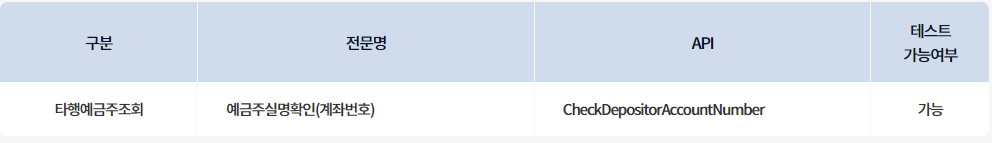


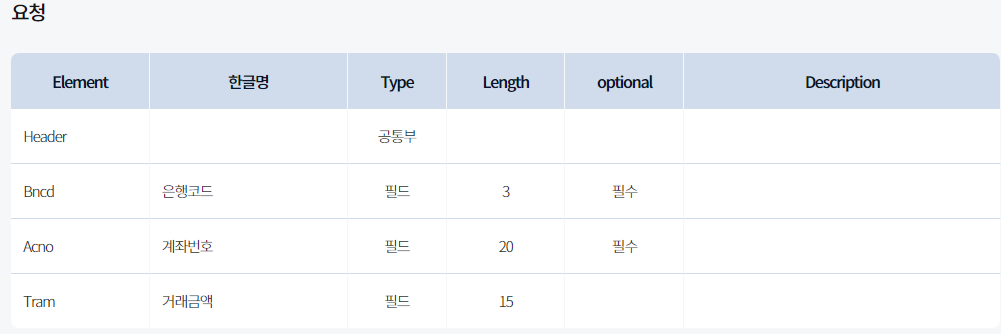

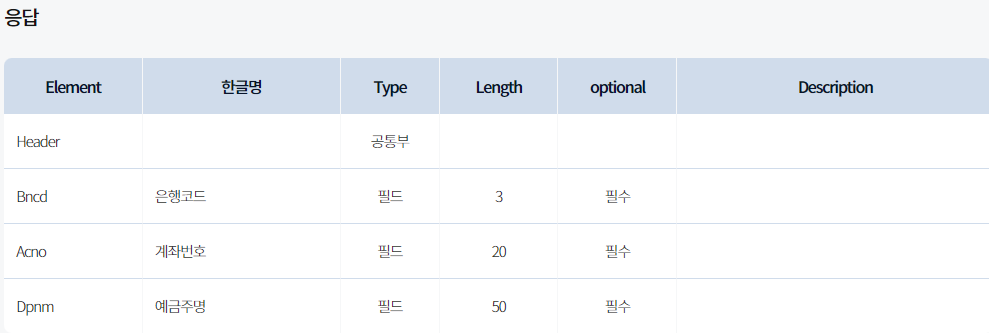

### Python 이용 타행예금주조회

조회를 하기 위해서

1. 은행코드: https://www.kftc.or.kr/kftc/data/EgovBankListMove.do  에서 "금융회사 공동코드" 다운로드
1. **서비스관리** 에서 조회 가능
    - 기관코드
    - 인증코드


In [ ]:
url_depositother = 'https://developers.nonghyup.com/InquireDepositorOtherBank.nh'
data = {
  "Header": {
    "ApiNm": "InquireDepositorOtherBank",
    "Tsymd": "20211023",
    "Trtm": "120601",
    "Iscd": "001162",
    "FintechApsno": "001",
    "ApiSvcCd": "DrawingTransferA",
    "IsTuno": "00013",
    "AccessToken": "[토큰]"
  },
  "Bncd": "088",
  "Acno":""
}

response = requests.post(url_depositother, json=data)
response.status_code

In [ ]:
response.json()

## 예금주 조회

농협계좌에 대한 예금주정보를 인터넷뱅킹이나 펌뱅킹을 이용하지 않고 오픈API를 통해 실시간으로 조회할 수 있는 서비스입니다.

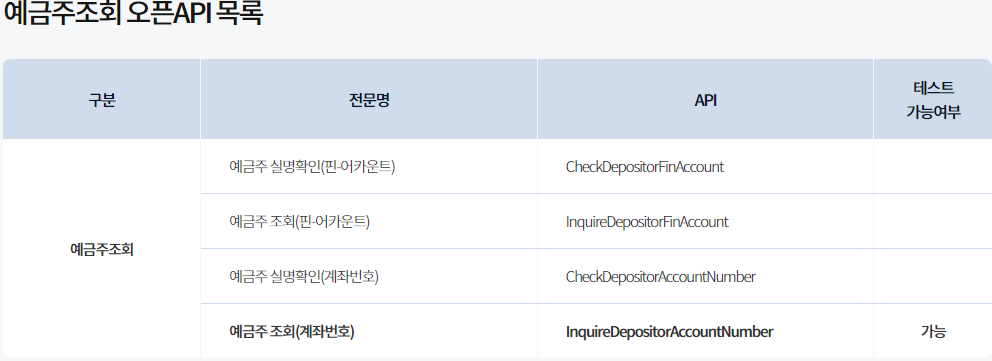

### 예금주조회 API

- 기능 : 핀-어카운트 연결계좌에 대한 예금주명을 조회합니다.
- 방식 : HTTPS-POST
- 호출정보 : InquireDepositorFinAccount.nh
- 호출결과 : JSON

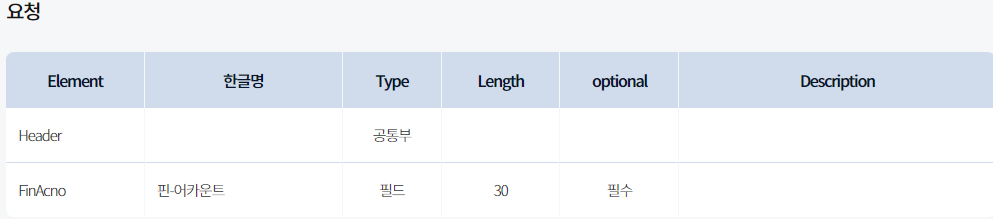

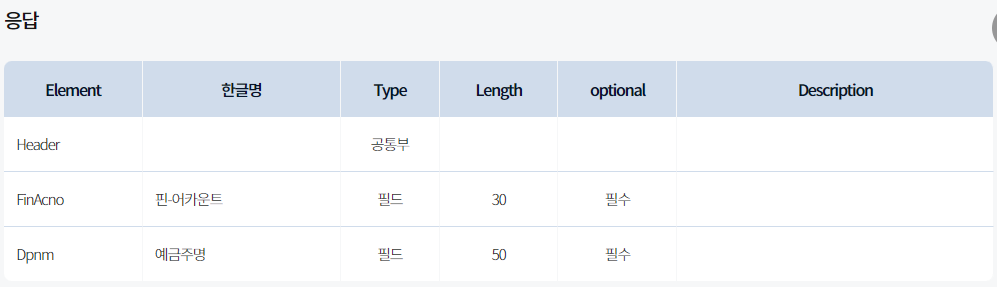